# Spearman's Correlation Coefficient


## Overview
In `scores`, the `spearmanr` function is used to compute Spearman's rank correlation coefficient between two datasets (e.g., observations and forecasts). While Spearman’s and Pearson’s correlation coefficients can yield similar values when the relationship is nearly linear, they measure different types of association. Spearman’s correlation captures monotonic relationships, regardless of whether they are linear, whereas Pearson’s correlation specifically measures the strength of a linear relationship. As a result, in cases where the relationship is non-linear but monotonic, Spearman’s correlation may be higher than Pearson’s.

In [1]:
from scores.continuous.correlation import spearmanr

import matplotlib.pyplot as plt

import numpy as np
import xarray as xr

np.random.seed(42)  # Ensures consistent values across notebook runs

In [2]:
# Generate monotonic function data
x_monotonic = np.arange(100)
y_monotonic = np.log1p(x_monotonic) + np.random.normal(scale=0.1, size=100)  # Logarithmic relationship with noise

# Generate linear data
x_linear = np.linspace(0, 10, 100)
y_linear = 3 * x_linear + 5 * np.random.normal(scale=0.1, size=100)  # Linear relationship with noise

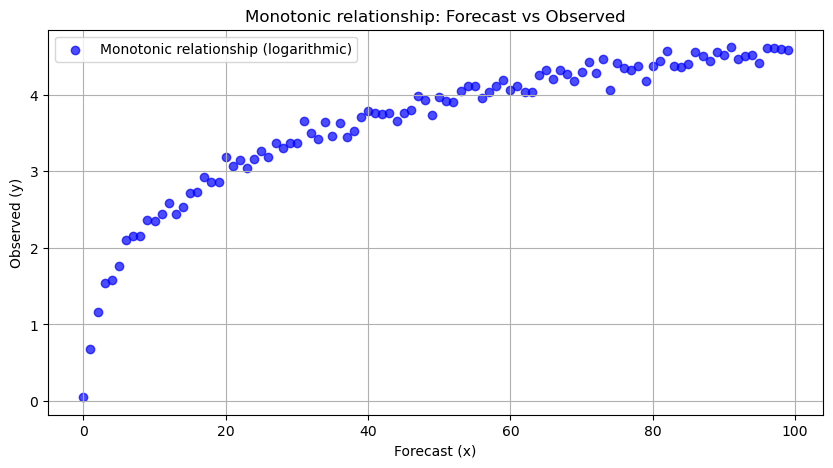

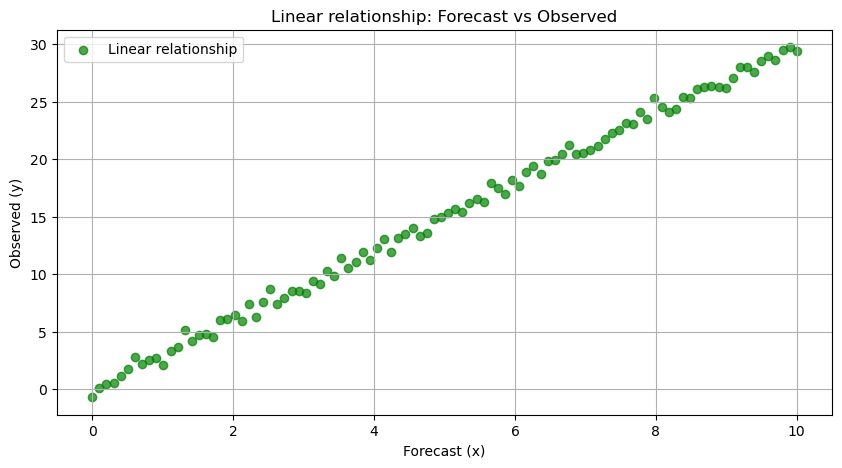

In [3]:
# Plot monotonic data
plt.figure(figsize=(10, 5))
plt.scatter(x_monotonic, y_monotonic, label="Monotonic relationship (logarithmic)", color="blue", alpha=0.7)
plt.title("Monotonic relationship: Forecast vs Observed")
plt.xlabel("Forecast (x)")
plt.ylabel("Observed (y)")
plt.legend()
plt.grid()
plt.show()

# Plot linear data
plt.figure(figsize=(10, 5))
plt.scatter(x_linear, y_linear, label="Linear relationship", color="green", alpha=0.7)
plt.title("Linear relationship: Forecast vs Observed")
plt.xlabel("Forecast (x)")
plt.ylabel("Observed (y)")
plt.legend()
plt.grid()
plt.show()

In [4]:
# Convert to xarray.DataArray
fcst_monotonic = xr.DataArray(x_monotonic, dims="time", name="forecast")
obs_monotonic = xr.DataArray(y_monotonic, dims="time", name="observed")

fcst_linear = xr.DataArray(x_linear, dims="time", name="forecast")
obs_linear = xr.DataArray(y_linear, dims="time", name="observed")

# Pearson and Spearman Correlation for Monotonic Data
spearman_monotonic = spearmanr(fcst_monotonic, obs_monotonic, reduce_dims="time")
pearson_monotonic = xr.corr(fcst_monotonic, obs_monotonic, dim="time")

# Pearson and Spearman Correlation for Linear Data
spearman_linear = spearmanr(fcst_linear, obs_linear, reduce_dims="time")
pearson_linear = xr.corr(fcst_linear, obs_linear, dim="time")

In [5]:
# Print results - note that due to the noise the correlations are not 1.
print("Monotonic Relationship:")
print(f"Spearman Correlation: {spearman_monotonic.values}")
print(f"Pearson Correlation: {pearson_monotonic.values}")

print("\nLinear Relationship:")
print(f"Spearman Correlation: {spearman_linear.values}")
print(f"Pearson Correlation: {pearson_linear.values}")

Monotonic Relationship:
Spearman Correlation: 0.986078607860786
Pearson Correlation: 0.8989931737820369

Linear Relationship:
Spearman Correlation: 0.9984398439843984
Pearson Correlation: 0.9985333442912309


## Monotonic Relationship

Spearman Correlation:
    Spearman’s correlation assesses monotonic relationships by ranking the data. Although the relationship is not strictly linear, the ranks of the forecast (`x_monotonic`) and observed (`y_monotonic`) values follow a consistent monotonic trend. As a result, Spearman’s correlation is expected to be high, close to 1, indicating a strong monotonic association.

Pearson Correlation:
    Pearson’s correlation measures the strength of a linear relationship. Since the monotonic relationship here is logarithmic (i.e. non-linear), the Pearson correlation is expected to be lower than the Spearman correlation. However, it may still be moderately high if the log curve approximates a straight line over the observed range.

## Linear Relationship

Spearman Correlation:
    Linearity implies monotonicity, so the ranks of the forecast and observed values align perfectly. Therefore, Spearman’s correlation should be very close to 1.

Pearson Correlation:
    The linear relationship fits Pearson's requirements exactly, so the Pearson correlation should also be very close to 1. Any deviation is caused by the noise added to the data.

## xr.Dataset example

In [6]:
# Example with xr.Dataset
dataset_fcst = xr.Dataset({"var1": fcst_linear, "var2": fcst_monotonic})
dataset_obs = xr.Dataset({"var1": obs_linear, "var2": obs_monotonic})

spearman_dataset = spearmanr(dataset_fcst, dataset_obs, reduce_dims="time")
print("\nDataset Spearman Correlations:")
print(spearman_dataset)


Dataset Spearman Correlations:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    var1     float64 8B 0.9984
    var2     float64 8B 0.9861


## Further Reading

- Spearman, C. (1904). The Proof and Measurement of Association between Two Things. The American Journal of Psychology, 15(1), 72–101. [https://doi.org/10.2307/1412159](https://doi.org/10.2307/1412159)
- [Wikipedia: Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)